In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
#This imports the necessary path to draw the single pad transmon design. 
import sys
sys.path.append('../Customized_Components')
from single_pad_transmon_pocket import TransmonPocket_Single
from LaunchpadWirebondCustom import LaunchpadWirebondCustom
from CoupledLineTee import CoupledLineTee


import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [3]:
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround

from qiskit_metal.qlibrary.tlines.mixed_path import RouteMeander, RouteMixed
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight

# from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
# from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond


import pyEPR as epr

import Default_res_params as dp

from qiskit_metal.toolbox_metal.parsing import *
from collections import OrderedDict

In [4]:
import pandas as pd
import numpy as np

In [5]:
sys.path.append('/Users/wendy/Desktop/Wendy-qiskit-code/Customized_Components')
import Transmon_specifications as jj
from rounded_rectangle import rounded_rec as rec2
from rounded_rectangle import rounded_rec_only as rec

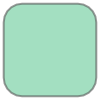

In [6]:
w = 10
h = 10
r = 2

rec(w,h,r)

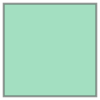

In [7]:
draw.rectangle(w, h)

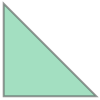

In [8]:
triangle_pts = [(0, 0), (w, 0), (0, h)]
draw.Polygon(triangle_pts)

In [9]:
rectangle = draw.rectangle(w, h)
triangle = draw.Polygon(triangle_pts)

In [10]:
triangle = draw.translate(triangle,w/2,-h/2)

In [11]:
draw.shapely.ops.unary_union([rectangle, right_triangle, left_triangle])

NameError: name 'right_triangle' is not defined

In [12]:
w_bridge = 5.7
l_transition = 4
l_bridge = 28
step_transition = 0.125
w_center_bridge = 3.7


In [13]:
w_bridge_edge = (w_bridge - w_center_bridge)/2
n_steps = int((l_transition-w_bridge_edge)/step_transition)

## Make the slopped bridge structure

In [26]:
polys = []

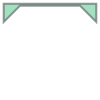

In [27]:
rectangle = draw.rectangle(w_bridge,step_transition)
# rectangle
triangle_pts = [(w_center_bridge/2,-step_transition/2), (w_bridge/2, -step_transition/2), (w_bridge/2, -step_transition/2-w_bridge_edge)]
right_triangle = draw.Polygon(triangle_pts)
triangle_pts = [(-w_center_bridge/2,-step_transition/2), (-w_bridge/2, -step_transition/2), (-w_bridge/2, -step_transition/2-w_bridge_edge)]
left_triangle = draw.Polygon(triangle_pts)
p = draw.shapely.ops.unary_union([rectangle, right_triangle, left_triangle])
polys.append(p)
p

In [28]:
center_rec = draw.rectangle(w_center_bridge,step_transition)

In [29]:

for i in range(n_steps):
    center_rec = draw.translate(center_rec,0,-step_transition)
    # rectangle
    poly_pts = [(w_center_bridge/2,step_transition/2-step_transition*(i+1)), 
                (w_bridge/2, step_transition/2-w_bridge_edge-step_transition*(i+1)), 
                (w_bridge/2, step_transition/2-w_bridge_edge-step_transition*(i+2)),
                (w_center_bridge/2,step_transition/2-step_transition*(i+2))]
    right_poly = draw.Polygon(poly_pts)
    poly_pts = [(-w_center_bridge/2,step_transition/2-step_transition*(i+1)), 
                (-w_bridge/2, step_transition/2-w_bridge_edge-step_transition*(i+1)), 
                (-w_bridge/2, step_transition/2-w_bridge_edge-step_transition*(i+2)),
                (-w_center_bridge/2,step_transition/2-step_transition*(i+2))]
    left_poly = draw.Polygon(poly_pts)
    p = draw.shapely.ops.unary_union([center_rec, right_poly, left_poly])
    polys.append(p)

In [30]:
n_taper_out = int(w_bridge_edge/step_transition)

In [31]:
target_pt_y = step_transition/2-w_bridge_edge-step_transition*(i+2)

In [32]:
for j in range(n_taper_out):
    center_rec = draw.translate(center_rec,0,-step_transition)
    triangle_pts = [(w_center_bridge/2,target_pt_y+w_bridge_edge-step_transition*(j)), (w_center_bridge/2,target_pt_y+w_bridge_edge-step_transition*(j+1)), (w_bridge/2, target_pt_y)]
    right_triangle = draw.Polygon(triangle_pts)
    triangle_pts = [(-w_center_bridge/2,target_pt_y+w_bridge_edge-step_transition*(j)), (-w_center_bridge/2,target_pt_y+w_bridge_edge-step_transition*(j+1)), (-w_bridge/2, target_pt_y)]
    left_triangle = draw.Polygon(triangle_pts)
    p = draw.shapely.ops.unary_union([center_rec, right_triangle, left_triangle])
    polys.append(p)

In [33]:
center_rec = draw.translate(center_rec,0,-step_transition)
right_poly_pts = [(w_center_bridge/2,target_pt_y),
                  (w_bridge/2, target_pt_y),
                  (w_bridge/2, target_pt_y-step_transition),
                  (w_center_bridge/2,target_pt_y-step_transition)]
right_poly = draw.Polygon(right_poly_pts)
left_poly_pts = [(-w_center_bridge/2,target_pt_y),
                  (-w_bridge/2, target_pt_y),
                  (-w_bridge/2, target_pt_y-step_transition),
                  (-w_center_bridge/2,target_pt_y-step_transition)]
left_poly = draw.Polygon(left_poly_pts)

p = draw.shapely.ops.unary_union([center_rec, right_poly, left_poly])


In [36]:
polys.append(p)

In [37]:
import matplotlib.pyplot as plt

# Plot the polygons

fig, ax = plt.subplots()
for polygon in polys:
    exterior_coords = polygon.exterior.coords.xy
    ax.plot(exterior_coords[0], exterior_coords[1], 'b-', linewidth=2)
    ax.plot(exterior_coords[0], exterior_coords[1], 'ro')  # Optionally, plot the vertices

# Set the aspect ratio to be equal
ax.set_aspect('equal')

# Add grid and labels
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Multiple Polygons Plot')

# Show the plot
plt.show()

In [178]:
len(polys)

32